# LLaVA 
Testing and fine-tuning models. Prompt engineering.

**Notes**
- Kernel: `/home/mjcho/micromamba/envs/llava` 
- `micromamba` is used for package management

## Data preparation



In [7]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
import shutil

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# load the data
label_dat = pd.read_csv('/home/mjcho/Food_Identification/data/label_features_ocr.csv')

# code food_drink_brand
label_dat['food_drink_brand'] = 0
label_dat.loc[(label_dat.food_or_drink == 1) & (label_dat.brand == 0), 'food_drink_brand'] = 1
label_dat.loc[(label_dat.food_or_drink == 1) & (label_dat.brand == 1), 'food_drink_brand'] = 2

# print counts
print(label_dat.food_drink_brand.value_counts())

/var/tmp/ipykernel_41236/2663000194.py:2: DtypeWarning: Columns (771,772,773,774,775,776,778,779,780,781,782,783,784,789,790,791,792,795,797,799,801,802) have mixed types. Specify dtype option on import or set low_memory=False.
  label_dat = pd.read_csv('/home/mjcho/Food_Identification/data/label_features_ocr.csv')


food_drink_brand
0    22965
1      221
2       82
Name: count, dtype: int64


In [9]:
# Compile a dataframe contains all the rows where food_drink_brand is 1 or 2
y_dat = label_dat[label_dat.food_drink_brand != 0]

# Randomly select 3 times the number of rows of y_dat from label_dat where food_drink_brand is 0
n = y_dat.shape[0]
n_rows = 5 * n
# select rows from label_dat where food_drink_brand is 0
n_dat = label_dat[label_dat.food_drink_brand == 0].sample(n=n_rows, random_state=370)

# Combine y_dat and n_dat
dat = pd.concat([y_dat, n_dat], axis=0)
dat.reset_index(drop=True, inplace=True)
print(dat.shape)
dat.head()


(1818, 831)


,image_id,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,food_or_drink,brand_t,brand_i,brand,pid,image_link,date,time,text,food_drink_brand
0,family_1002321_brynnalana98@gmail.com202105130...,-0.5850,-0.3547,0.01146,-0.3430,-0.2980,0.1302,0.21350,0.2710,0.03014,...,1,0,1,1,family_1002321_brynnalana98@gmail.com,hs-nero-phi-reeves-haitech-appspot-com-family/...,2021-05-13,03:09:10.332000,@ $ 5 $ 8.09 Following For You 197K white wome...,2
1,family_1002321_brynnalana98@gmail.com202105130...,-0.1741,-0.2370,-0.13720,0.3206,-0.3950,0.1630,0.17860,0.4438,0.20970,...,1,0,1,1,family_1002321_brynnalana98@gmail.com,hs-nero-phi-reeves-haitech-appspot-com-family/...,2021-05-13,03:09:15.333000,@ $ 0 8.09 Following For You 197 white women a...,2
2,family_1002321_brynnalana98@gmail.com202105130...,-0.2274,-0.4010,0.05176,0.1183,-0.3530,0.2588,-0.05957,0.4880,0.36500,...,1,0,1,1,family_1002321_brynnalana98@gmail.com,hs-nero-phi-reeves-haitech-appspot-com-family/...,2021-05-13,03:09:20.335000,@ $ 0 8.09 Following For You 7 197K white wome...,2
3,family_1002321_brynnalana98@gmail.com202105130...,-0.2870,-0.5645,0.40060,-0.1080,-0.8384,0.1603,0.01624,0.5780,0.33980,...,1,0,1,1,family_1002321_brynnalana98@gmail.com,hs-nero-phi-reeves-haitech-appspot-com-family/...,2021-05-13,03:09:25.337000,"8.09 For Following You 1 [ 19,7k white women a...",2
4,family_1002321_brynnalana98@gmail.com202105130...,-0.5230,-0.8960,0.01814,0.1549,-0.7550,0.2769,0.02353,0.5884,0.29100,...,1,0,1,1,family_1002321_brynnalana98@gmail.com,hs-nero-phi-reeves-haitech-appspot-com-family/...,2021-05-13,03:09:30.338000,@ $ 8.09 For Following You 197K white women ar...,2


In [10]:
# check if all image_ids in dat exist in the folder /home/mjcho/Food_Identification/labeled_imgs_resized_0.5
img_folder = '/home/mjcho/Food_Identification/labeled_imgs_resized_0.5'
img_files = os.listdir(img_folder)
dat['img_exists'] = dat.image_id.isin(img_files)
print(dat.img_exists.value_counts())

# subset dat to only include rows where img_exists is True
# dat = dat[dat.img_exists]

img_exists
True     1733
False      85
Name: count, dtype: int64


In [11]:
# print image_id that does not have an image
# This is because these images were not downloaded in Viewer.ipynb, maybe due to wrong image_id input when labeling
dat['image_id'][dat['img_exists'] == False]

313     family_200211_harrislore@hotmail.com2021052316...
330     w5_3309_raerenae_33@yahoo.com20201129213119150...
331     family_201142_munchiepoo1122@gmail.com20210521...
345        w5_1551_jule79j@gmail.com20201028233129960.jpg
374     family_206865_luv2readhere@gmail.com2021071912...
                              ...                        
1751    w5_3439_bryanhickman98@yahoo.com20201207154444...
1757    family_206737_takaruharris@gmail.com2021072101...
1762    w5_2456_bon.bon.stahl@gmail.com202007132307286...
1778    family_1002321_brynnalana98@gmail.com202105302...
1783    w5_2456_bon.bon.stahl@gmail.com202007132301133...
Name: image_id, Length: 85, dtype: object

In [12]:
dat.shape

(1818, 832)

In [13]:
# # create a folder to store images, then copy images that are in dat.image_id from img_folder to the new folder

# import os

# # create a folder to store images
# img_folder_new = '/home/mjcho/Food_Identification/llava-food_drink_brand'
# if not os.path.exists(img_folder_new):
#     os.makedirs(img_folder_new)

# # copy images
# for img in dat.image_id:
#     shutil.copy(os.path.join(img_folder, img), os.path.join(img_folder_new, img))   


In [ ]:
# save dat to a csv file, include both image_id and food_drink_brand
dat.to_csv('/home/mjcho/Food_Identification/data/llava-food_drink_brand.csv', index=False)

## LLaVA: no tuning

In [ ]:
%load_ext autoreload
%autoreload 2

from llava.model.builder import load_pretrained_model
from llava.mm_utils import get_model_name_from_path
from llava.eval.run_llava import eval_model
from llava.utils import disable_torch_init
from llava.conversation import conv_templates, SeparatorStyle
from llava.mm_utils import (
    process_images,
    tokenizer_image_token,
    get_model_name_from_path,
)

import torch
import re 
from pathlib import Path
from PIL import Image
from io import BytesIO
import requests
from tqdm import tqdm

from llava.constants import (
    IMAGE_TOKEN_INDEX,
    DEFAULT_IMAGE_TOKEN,
    DEFAULT_IM_START_TOKEN,
    DEFAULT_IM_END_TOKEN,
    IMAGE_PLACEHOLDER,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# # Test loading model
# model_path = "liuhaotian/llava-v1.6-mistral-7b"

# tokenizer, model, image_processor, context_len = load_pretrained_model(
#     model_path=model_path,
#     model_base=None,
#     model_name=get_model_name_from_path(model_path)
# )

In [ ]:
# model_path = "liuhaotian/llava-v1.5-7b"
# prompt = "What are the things for eating and drinking in this image?"
# image_file = "https://llava-vl.github.io/static/images/view.jpg" # "images/fastfood.jpg"

# args = type('Args', (), {
#     "model_path": model_path,
#     "model_base": None,
#     "model_name": get_model_name_from_path(model_path),
#     "query": prompt,
#     "conv_mode": None,
#     "image_file": image_file,
#     "sep": ",",
#     "temperature": 0,
#     "top_p": None,
#     "num_beams": 1,
#     "max_new_tokens": 512
# })()

# eval_model(args)

In [ ]:
# Load model

disable_torch_init()

model_path = "liuhaotian/llava-v1.5-7b" # 
# model_path = "liuhaotian/llava-v1.6-mistral-7b"

model_name = get_model_name_from_path(model_path)
tokenizer, model, image_processor, context_len = load_pretrained_model(
    model_path, model_base = None, model_name = model_name
)

You are using a model of type llava to instantiate a model of type llava_llama. This is not supported for all configurations of models and can yield errors.
Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]/home/mjcho/micromamba/envs/llava/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Loading checkpoint shards: 100%|██████████| 2/2 [03:06<00:00, 93.36s/it] 


In [ ]:
model.device

device(type='cuda', index=0)

In [ ]:
# args
# "model_path": model_path,
# "model_base": None,
# "model_name": get_model_name_from_path(model_path),
# "query": prompt,
# "conv_mode": None,
# "image_file": image_file,
# "sep": ",",
# "temperature": 0,
# "top_p": None,
# "num_beams": 1,
# "max_new_tokens": 512

# choose conv mode
if "llama-2" in model_name.lower():
    conv_mode = "llava_llama_2"
elif "mistral" in model_name.lower():
    conv_mode = "mistral_instruct"
elif "v1.6-34b" in model_name.lower():
    conv_mode = "chatml_direct"
elif "v1" in model_name.lower():
    conv_mode = "llava_v1"
elif "mpt" in model_name.lower():
    conv_mode = "mpt"
else:
    conv_mode = "llava_v0"

temperature = 0
top_p = None
num_beams = 1
max_new_tokens = 512

In [ ]:
# format query
qs = "Please analyze the content of the provided image to determine if it contains any food or drink items. If you find no food or drink items in either text or image format, reply with 0. If you find food or drink items that are not branded, reply with 1. If you find food or drink items that are branded, reply with 2." 
image_token_se = DEFAULT_IM_START_TOKEN + DEFAULT_IMAGE_TOKEN + DEFAULT_IM_END_TOKEN
if IMAGE_PLACEHOLDER in qs:
    if model.config.mm_use_im_start_end:
        qs = re.sub(IMAGE_PLACEHOLDER, image_token_se, qs)
    else:
        qs = re.sub(IMAGE_PLACEHOLDER, DEFAULT_IMAGE_TOKEN, qs)
else:
    if model.config.mm_use_im_start_end:
        qs = image_token_se + "\n" + qs
    else:
        qs = DEFAULT_IMAGE_TOKEN + "\n" + qs

In [ ]:
conv = conv_templates[conv_mode].copy()
conv.append_message(conv.roles[0], qs)
conv.append_message(conv.roles[1], None)
prompt = conv.get_prompt()

input_ids = (
    tokenizer_image_token(prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors="pt")
    .unsqueeze(0)
    .cuda()
)

In [ ]:
def load_images(image_files):
    out = []
    for image_file in image_files:
        image = load_image(image_file)
        out.append(image)
    return out

def load_image(image_file):
    if image_file.startswith("http") or image_file.startswith("https"):
        response = requests.get(image_file)
        image = Image.open(BytesIO(response.content)).convert("RGB")
    else:
        image = Image.open(image_file).convert("RGB")
    return image


### Testing

In [ ]:
# load images
image_files =  Path("images").glob("*.jpeg")
# convert image_files to list of strings
image_files = [str(image_file) for image_file in image_files]
print(image_files)
# images = load_images(image_files)
images = [load_image(image_files[0])]
image_sizes = [x.size for x in images]
images_tensor = process_images(
    images,
    image_processor,
    model.config
).to(model.device, dtype=torch.float16)

# check
print(type(images_tensor))
print(images_tensor.shape)
print(images_tensor.device)

['images/fastfood.jpeg', 'images/tacobell.jpeg']
<class 'torch.Tensor'>
torch.Size([1, 3, 336, 336])
cuda:0


In [ ]:
conv = conv_templates[conv_mode].copy()
conv.append_message(conv.roles[0], qs)
conv.append_message(conv.roles[1], None)
prompt = conv.get_prompt()

In [ ]:
input_ids = (
    tokenizer_image_token(prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors="pt")
    .unsqueeze(0)
    .cuda()
)

In [ ]:
with torch.inference_mode():
    output_ids = model.generate(
        input_ids,
        images=images_tensor,
        image_sizes=image_sizes,
        do_sample=True if temperature > 0 else False,
        temperature=temperature,
        top_p=top_p,
        num_beams=num_beams,
        max_new_tokens=max_new_tokens,
        use_cache=False,
    )

outputs = tokenizer.batch_decode(output_ids, skip_special_tokens=True)[0].strip()
print(outputs)

/home/mjcho/micromamba/envs/llava/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/home/mjcho/micromamba/envs/llava/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:397: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `None` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


2


In [ ]:
outputs = tokenizer.batch_decode(output_ids, skip_special_tokens=True)[0]
print(outputs)

2


### Iterate over image files

In [ ]:
conv = conv_templates[conv_mode].copy()
conv.append_message(conv.roles[0], qs)
conv.append_message(conv.roles[1], None)
prompt = conv.get_prompt()

input_ids = (
    tokenizer_image_token(prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors="pt")
    .unsqueeze(0)
    .cuda()
)

In [ ]:
# load data
dat = pd.read_csv('/home/mjcho/Food_Identification/data/llava-food_drink_brand.csv')
# image file is '/home/mjcho/Food_Identification/llava-food_drink_brand/' + dat.image_id, store in a list
image_files = ['/home/mjcho/Food_Identification/llava-food_drink_brand/' + x for x in dat.image_id]
# print(image_files)
# images = load_images(image_files)


/var/tmp/ipykernel_3328/1923642204.py:2: DtypeWarning: Columns (771,772,773,774,775,776,779,780,781,782,789,790,791,792,795,797,799,801,802) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv('/home/mjcho/Food_Identification/data/llava-food_drink_brand.csv')


In [ ]:
len(image_files)

1733

In [ ]:
image_files[0]

'/home/mjcho/Food_Identification/llava-food_drink_brand/family_1002321_brynnalana98@gmail.com20210513030910332.jpg'

In [ ]:
outputs = []
for image_file in tqdm(image_files):
    images = [load_image(image_file)]
    image_sizes = [x.size for x in images]
    images_tensor = process_images(
        images,
        image_processor,
        model.config
    ).to(model.device, dtype=torch.float16)


    with torch.inference_mode():
        output_ids = model.generate(
            input_ids,
            images=images_tensor,
            image_sizes=image_sizes,
            do_sample=True if temperature > 0 else False,
            temperature=temperature,
            top_p=top_p,
            num_beams=num_beams,
            max_new_tokens=max_new_tokens,
            use_cache=False,
        )

    output = tokenizer.batch_decode(output_ids, skip_special_tokens=True)[0]
    outputs.append(output)

  0%|          | 0/1733 [00:00<?, ?it/s]

/home/mjcho/micromamba/envs/llava/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/home/mjcho/micromamba/envs/llava/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:397: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `None` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
100%|██████████| 1733/1733 [09:03<00:00,  3.19it/s]


In [ ]:
# convert outputs to int64 then add to dat as llava_food_drink_brand
dat['llava_food_drink_brand'] = outputs
dat['llava_food_drink_brand'] = dat['llava_food_drink_brand'].astype(int)

dat.to_csv('/home/mjcho/Food_Identification/data/llava-food_drink_brand.csv', index=False)

In [ ]:
dat.head()

,image_id,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,brand_i,brand,pid,image_link,date,time,text,food_drink_brand,img_exists,llava_food_drink_brand
0,family_1002321_brynnalana98@gmail.com202105130...,-0.5850,-0.3547,0.01146,-0.3430,-0.2980,0.1302,0.21350,0.2710,0.03014,...,1,1,family_1002321_brynnalana98@gmail.com,hs-nero-phi-reeves-haitech-appspot-com-family/...,2021-05-13,03:09:10.332000,@ $ 5 $ 8.09 Following For You 197K white wome...,2,True,1
1,family_1002321_brynnalana98@gmail.com202105130...,-0.1741,-0.2370,-0.13720,0.3206,-0.3950,0.1630,0.17860,0.4438,0.20970,...,1,1,family_1002321_brynnalana98@gmail.com,hs-nero-phi-reeves-haitech-appspot-com-family/...,2021-05-13,03:09:15.333000,@ $ 0 8.09 Following For You 197 white women a...,2,True,0
2,family_1002321_brynnalana98@gmail.com202105130...,-0.2274,-0.4010,0.05176,0.1183,-0.3530,0.2588,-0.05957,0.4880,0.36500,...,1,1,family_1002321_brynnalana98@gmail.com,hs-nero-phi-reeves-haitech-appspot-com-family/...,2021-05-13,03:09:20.335000,@ $ 0 8.09 Following For You 7 197K white wome...,2,True,2
3,family_1002321_brynnalana98@gmail.com202105130...,-0.2870,-0.5645,0.40060,-0.1080,-0.8384,0.1603,0.01624,0.5780,0.33980,...,1,1,family_1002321_brynnalana98@gmail.com,hs-nero-phi-reeves-haitech-appspot-com-family/...,2021-05-13,03:09:25.337000,"8.09 For Following You 1 [ 19,7k white women a...",2,True,2
4,family_1002321_brynnalana98@gmail.com202105130...,-0.5230,-0.8960,0.01814,0.1549,-0.7550,0.2769,0.02353,0.5884,0.29100,...,1,1,family_1002321_brynnalana98@gmail.com,hs-nero-phi-reeves-haitech-appspot-com-family/...,2021-05-13,03:09:30.338000,@ $ 8.09 For Following You 197K white women ar...,2,True,2


### Evaluate performance

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score
from sklearn.model_selection import cross_val_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def show_performance_metric(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    # printing metrics
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", report)

    ## Plot confusion matrix
    classes = np.unique(y_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    # fig, ax = plt.subplots()
    # sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
    #             cbar=False)
    # ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
    #     yticklabels=classes, title="Confusion matrix")
    # plt.yticks(rotation=0)

In [ ]:
# # add outputs to dat as llava_food_drink_brand
# # dat['llava_food_drink_brand'] = outputs
# # count values in dat.food_drink_brand
# dat.food_drink_brand.value_counts()
# # count values in dat.llava_food_drink_brand
# dat.llava_food_drink_brand.value_counts()

# read the data
dat = pd.read_csv('/home/mjcho/Food_Identification/data/llava-food_drink_brand.csv')

# code llava_food_drink_brand to llava_food_or_drink, where 0 is no food or drink, 1 is food or drink
dat['llava_food_or_drink'] = 0
dat.loc[dat.llava_food_drink_brand == 1, 'llava_food_or_drink'] = 1
dat.loc[dat.llava_food_drink_brand == 2, 'llava_food_or_drink'] = 1

# compute performance
show_performance_metric(dat.food_drink_brand, dat.llava_food_drink_brand)
show_performance_metric(dat.food_or_drink, dat.llava_food_or_drink)


Accuracy: 0.8545874206578188
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.93      1430
           1       0.58      0.25      0.35       221
           2       0.57      0.41      0.48        82

    accuracy                           0.85      1733
   macro avg       0.68      0.55      0.58      1733
weighted avg       0.83      0.85      0.83      1733

[[1392   28   10]
 [ 150   55   16]
 [  36   12   34]]
Accuracy: 0.8707443739180611
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.97      0.93      1430
           1       0.75      0.39      0.51       303

    accuracy                           0.87      1733
   macro avg       0.82      0.68      0.72      1733
weighted avg       0.86      0.87      0.85      1733

[[1392   38]
 [ 186  117]]


/var/tmp/ipykernel_133464/2113670144.py:9: DtypeWarning: Columns (771,772,773,774,775,776,779,780,781,782,789,790,791,792,795,797,799,801,802) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv('/home/mjcho/Food_Identification/data/llava-food_drink_brand.csv')


In [ ]:
# compute kappa for food_or_drink
kappa = cohen_kappa_score(dat.food_or_drink, dat.llava_food_or_drink)
print(f"Kappa: {kappa}")
kappa_b = cohen_kappa_score(dat.food_drink_brand, dat.llava_food_drink_brand)
print(f"Kappa: {kappa_b}")


Kappa: 0.44526882580910687
Kappa: 0.3941517741948909


In [ ]:
import pandas as pd

# read the data
dat = pd.read_csv('/home/mjcho/Food_Identification/data/llava-food_drink_brand.csv')

# get the image_id of the images that are misclassified
misclassified = dat[dat.food_drink_brand != dat.llava_food_drink_brand]
misclassified[['image_id', 'food_drink_brand', 'llava_food_drink_brand']][:10]

/var/tmp/ipykernel_3328/2495959385.py:4: DtypeWarning: Columns (771,772,773,774,775,776,779,780,781,782,789,790,791,792,795,797,799,801,802) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv('/home/mjcho/Food_Identification/data/llava-food_drink_brand.csv')


,image_id,food_drink_brand,llava_food_drink_brand
0,family_1002321_brynnalana98@gmail.com202105130...,2,1
1,family_1002321_brynnalana98@gmail.com202105130...,2,0
5,family_1002321_brynnalana98@gmail.com202105130...,2,0
6,family_1002321_brynnalana98@gmail.com202105130...,2,0
7,family_1002321_brynnalana98@gmail.com202105130...,2,1
8,family_1002321_brynnalana98@gmail.com202105130...,2,1
9,family_1002321_brynnalana98@gmail.com202105130...,2,1
12,family_1002321_brynnalana98@gmail.com202105130...,2,0
13,family_1002321_brynnalana98@gmail.com202105130...,1,0
14,family_1002321_brynnalana98@gmail.com202105130...,1,0


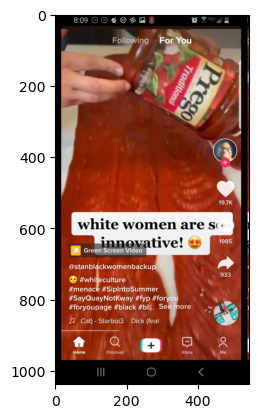

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# plot the first image that are misclassified
img = mpimg.imread(f'/home/mjcho/Food_Identification/labeled_imgs_resized_0.5/{misclassified.iloc[3].image_id}')
imgplot = plt.imshow(img)


In [ ]:
images = [load_image(f'/home/mjcho/Food_Identification/labeled_imgs_resized_0.5/{misclassified.iloc[3].image_id}')]
image_sizes = [x.size for x in images]
images_tensor = process_images(
    images,
    image_processor,
    model.config
).to(model.device, dtype=torch.float16)


with torch.inference_mode():
    output_ids = model.generate(
        input_ids,
        images=images_tensor,
        image_sizes=image_sizes,
        do_sample=True if temperature > 0 else False,
        temperature=temperature,
        top_p=top_p,
        num_beams=num_beams,
        max_new_tokens=max_new_tokens,
        use_cache=False,
    )

output = tokenizer.batch_decode(output_ids, skip_special_tokens=True)[0]
print(output)

2


## LLaVA: fine-tuning

To setup env, see:
https://github.com/haotian-liu/LLaVA/issues/1101#issuecomment-1933697654

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import os
import shutil

import torch
import re 
from pathlib import Path
from PIL import Image
from io import BytesIO
import requests
from tqdm import tqdm

from llava.model.builder import load_pretrained_model
from llava.mm_utils import get_model_name_from_path
from llava.eval.run_llava import eval_model
from llava.utils import disable_torch_init
from llava.conversation import conv_templates, SeparatorStyle
from llava.mm_utils import (
    process_images,
    tokenizer_image_token,
    get_model_name_from_path,
)

from llava.constants import (
    IMAGE_TOKEN_INDEX,
    DEFAULT_IMAGE_TOKEN,
    DEFAULT_IM_START_TOKEN,
    DEFAULT_IM_END_TOKEN,
    IMAGE_PLACEHOLDER,
)

/home/mjcho/micromamba/envs/llava/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2024-03-21 03:52:17,996] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)


### Create dataset for tuning
Divide the labeled dataset 

In [2]:
# load the data
label_dat = pd.read_csv('/home/mjcho/Food_Identification/data/label_features_ocr.csv')

# code food_drink_brand
label_dat['food_drink_brand'] = 0
label_dat.loc[(label_dat.food_or_drink == 1) & (label_dat.brand == 0), 'food_drink_brand'] = 1
label_dat.loc[(label_dat.food_or_drink == 1) & (label_dat.brand == 1), 'food_drink_brand'] = 2

# print counts
print(label_dat.food_drink_brand.value_counts())

/var/tmp/ipykernel_63446/2663000194.py:2: DtypeWarning: Columns (771,772,773,774,775,776,778,779,780,781,782,783,784,789,790,791,792,795,797,799,801,802) have mixed types. Specify dtype option on import or set low_memory=False.
  label_dat = pd.read_csv('/home/mjcho/Food_Identification/data/label_features_ocr.csv')


food_drink_brand
0    22965
1      221
2       82
Name: count, dtype: int64


In [19]:
# Compile a dataframe contains 70% the rows where food_drink_brand is 1 or 2
y_dat = label_dat[label_dat.food_drink_brand != 0]

# Randomly select 9 times the number of rows of y_dat from label_dat where food_drink_brand is 0
n = y_dat.shape[0]
n_rows = 5 * n
# select rows from label_dat where food_drink_brand is 0
n_dat = label_dat[label_dat.food_drink_brand == 0].sample(n=n_rows, random_state=370)

# Combine y_dat and n_dat
dat = pd.concat([y_dat, n_dat], axis=0)
dat.reset_index(drop=True, inplace=True)
print(dat.shape)

# check if all image_ids in dat exist in the folder /home/mjcho/Food_Identification/labeled_imgs_resized_0.5
img_folder = '/home/mjcho/Food_Identification/labeled_imgs_resized_0.5'
img_files = os.listdir(img_folder)
dat['img_exists'] = dat.image_id.isin(img_files)
print(dat.img_exists.value_counts())

# subset dat to only include rows where img_exists is True
dat = dat[dat.img_exists]

# Split dat into train (for fine-tuning) and test, 50% each, stratify by food_drink_brand
from sklearn.model_selection import train_test_split
target = dat['food_drink_brand']
dat_train, dat_test = train_test_split(dat, test_size=0.2, stratify=target, random_state=370)

print(dat_train.food_drink_brand.value_counts())
print(dat_test.food_drink_brand.value_counts())


(1818, 831)
img_exists
True     1733
False      85
Name: count, dtype: int64
food_drink_brand
0    1144
1     177
2      65
Name: count, dtype: int64
food_drink_brand
0    286
1     44
2     17
Name: count, dtype: int64


In [20]:
dat_train.image_id[:10]

1728    family_201911_naalafigueras@gmail.com202105211...
1361    family_1004381_dumdumdurr1@gmail.com2021051517...
707     family_200211_harrislore@hotmail.com2021061715...
219     w5_1292_wahidsharon@gmail.com20200722235224217...
800     w5_5125520792_bjohnson121@yahoo.com20210109080...
1817     w5_8107_tko10tko6@gmail.com20200626181809381.jpg
1271     w5_4406_joeleal10@gmail.com20201230080529225.jpg
464     family_202051_saritavasa@gmail.com202106182348...
1197    family_100654_varunner7@aol.com202106281432137...
314     w5_8905_chinochichingdinero@gmail.com202011301...
Name: image_id, dtype: object

Convert to json format for LLaVA

In [21]:
"""
Convert dat_train to json format:
[
  {
    "id": f"{image_id}",
    "image": f"{image_id}",
    "conversations": [
      {
        "from": "human",
        "value": "<image>\n"Please analyze the content of the provided image to determine if it contains any food or drink items. If you find no food or drink items in either text or image format, reply with 0. If you find food or drink items that are not branded, reply with 1. If you find food or drink items that are branded, reply with 2." 
      },
      {
        "from": "gpt",
        "value": f"{food_drink_brand}"
      },
    ]
  },
  ...
]
"""

import json

# create a list of dictionaries
dat_train_json = []
for i in range(dat_train.shape[0]):
    image_id = dat_train.iloc[i].image_id
    food_drink_brand = dat_train.iloc[i].food_drink_brand
    dat_train_json.append({
        "id": f"{image_id}",
        "image": f"{image_id}",
        "conversations": [
            {
                "from": "human",
                "value": "<image>\nPlease analyze the content of the provided image to determine if it contains any food or drink items. If you find no food or drink items in either text or image format, reply with 0. If you find food or drink items that are not branded, reply with 1. If you find food or drink items that are branded, reply with 2." 
            },
            {
                "from": "gpt",
                "value": f"{food_drink_brand}"
            },
        ]
    })


# save dat_train_json to a json file
with open('/home/mjcho/Food_Identification/data/dat_train.json', 'w') as f:
    json.dump(dat_train_json, f)

### Tuning model

In [ ]:
# # This needs to be run in the terminal because it uses wandb
# !deepspeed llava/train/train_mem.py \
#     --lora_enable True --lora_r 128 --lora_alpha 256 --mm_projector_lr 2e-5 \
#     --deepspeed ./scripts/zero3.json \
#     --model_name_or_path  liuhaotian/llava-v1.5-7b \
#     --version v1 \
#     --data_path /home/mjcho/Food_Identification/data/dat_train.json \
#     --image_folder /home/mjcho/Food_Identification/labeled_imgs_resized_0.5 \
#     --vision_tower openai/clip-vit-large-patch14-336 \
#     --mm_projector_type mlp2x_gelu \
#     --mm_vision_select_layer -2 \
#     --mm_use_im_start_end False \
#     --mm_use_im_patch_token False \
#     --image_aspect_ratio pad \
#     --group_by_modality_length True \
#     --bf16 True \
#     --output_dir ./checkpoints/llava-v1.5-7b-task-lora \
#     --num_train_epochs 1 \
#     --per_device_train_batch_size 16 \
#     --per_device_eval_batch_size 4 \
#     --gradient_accumulation_steps 1 \
#     --evaluation_strategy "no" \
#     --save_strategy "steps" \
#     --save_steps 50000 \
#     --save_total_limit 1 \
#     --learning_rate 2e-4 \
#     --weight_decay 0. \
#     --warmup_ratio 0.03 \
#     --lr_scheduler_type "cosine" \
#     --logging_steps 1 \
#     --tf32 True \
#     --model_max_length 2048 \
#     --gradient_checkpointing True \
#     --dataloader_num_workers 4 \
#     --lazy_preprocess True \
#     --report_to wandb

### Prediction

In [22]:
# Load model

disable_torch_init()

model_path = "/home/Screenshot-LMM/LLaVA/checkpoints/llava-v1.5-7b-task-lora" # 
# model_path = "liuhaotian/llava-v1.6-mistral-7b"

model_name = get_model_name_from_path(model_path)
tokenizer, model, image_processor, context_len = load_pretrained_model(
    model_path, model_base = "liuhaotian/llava-v1.5-7b", model_name = model_name
)

Loading LLaVA from base model...


Loading checkpoint shards: 100%|██████████| 2/2 [00:04<00:00,  2.11s/it]


Loading additional LLaVA weights...
Loading LoRA weights...
Merging LoRA weights...
Model is loaded...


In [23]:
# args
# "model_path": model_path,
# "model_base": None,
# "model_name": get_model_name_from_path(model_path),
# "query": prompt,
# "conv_mode": None,
# "image_file": image_file,
# "sep": ",",
# "temperature": 0,
# "top_p": None,
# "num_beams": 1,
# "max_new_tokens": 512

# choose conv mode
if "llama-2" in model_name.lower():
    conv_mode = "llava_llama_2"
elif "mistral" in model_name.lower():
    conv_mode = "mistral_instruct"
elif "v1.6-34b" in model_name.lower():
    conv_mode = "chatml_direct"
elif "v1" in model_name.lower():
    conv_mode = "llava_v1"
elif "mpt" in model_name.lower():
    conv_mode = "mpt"
else:
    conv_mode = "llava_v0"

temperature = 0
top_p = None
num_beams = 1
max_new_tokens = 512

In [24]:
# format query
qs = "Please analyze the content of the provided image to determine if it contains any food or drink items. If you find no food or drink items in either text or image format, reply with 0. If you find food or drink items that are not branded, reply with 1. If you find food or drink items that are branded, reply with 2." 
image_token_se = DEFAULT_IM_START_TOKEN + DEFAULT_IMAGE_TOKEN + DEFAULT_IM_END_TOKEN
if IMAGE_PLACEHOLDER in qs:
    if model.config.mm_use_im_start_end:
        qs = re.sub(IMAGE_PLACEHOLDER, image_token_se, qs)
    else:
        qs = re.sub(IMAGE_PLACEHOLDER, DEFAULT_IMAGE_TOKEN, qs)
else:
    if model.config.mm_use_im_start_end:
        qs = image_token_se + "\n" + qs
    else:
        qs = DEFAULT_IMAGE_TOKEN + "\n" + qs

In [25]:
def load_images(image_files):
    out = []
    for image_file in image_files:
        image = load_image(image_file)
        out.append(image)
    return out

def load_image(image_file):
    if image_file.startswith("http") or image_file.startswith("https"):
        response = requests.get(image_file)
        image = Image.open(BytesIO(response.content)).convert("RGB")
    else:
        image = Image.open(image_file).convert("RGB")
    return image


In [26]:
conv = conv_templates[conv_mode].copy()
conv.append_message(conv.roles[0], qs)
conv.append_message(conv.roles[1], None)
prompt = conv.get_prompt()

input_ids = (
    tokenizer_image_token(prompt, tokenizer, IMAGE_TOKEN_INDEX, return_tensors="pt")
    .unsqueeze(0)
    .cuda()
)

In [27]:
# image file is '/home/mjcho/Food_Identification/llava-food_drink_brand/' + dat.image_id, store in a list
image_files = ['/home/mjcho/Food_Identification/labeled_imgs_resized_0.5/' + x for x in dat_test.image_id]
# print(image_files)
# images = load_images(image_files)


In [28]:
outputs = []
for image_file in tqdm(image_files):
    images = [load_image(image_file)]
    image_sizes = [x.size for x in images]
    images_tensor = process_images(
        images,
        image_processor,
        model.config
    ).to(model.device, dtype=torch.float16)


    with torch.inference_mode():
        output_ids = model.generate(
            input_ids,
            images=images_tensor,
            image_sizes=image_sizes,
            do_sample=True if temperature > 0 else False,
            temperature=temperature,
            top_p=top_p,
            num_beams=num_beams,
            max_new_tokens=max_new_tokens,
            use_cache=False,
        )

    output = tokenizer.batch_decode(output_ids, skip_special_tokens=True)[0]
    outputs.append(output)

  0%|          | 0/347 [00:00<?, ?it/s]/home/mjcho/micromamba/envs/llava/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/home/mjcho/micromamba/envs/llava/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:397: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `None` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
  0%|          | 1/347 [00:00<01:23,  4.14it/s]

100%|██████████| 347/347 [01:17<00:00,  4.48it/s]


In [32]:
# convert outputs to int64 then add to dat_test as llava_food_drink_brand
dat_test['llava_food_drink_brand'] = outputs
dat_test['llava_food_drink_brand'] = dat_test['llava_food_drink_brand'].astype(int)

dat_test.to_csv('/home/mjcho/Food_Identification/data/llava-lora-food_drink_brand.csv', index=False)

In [33]:
dat_test.head()

,image_id,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,brand_i,brand,pid,image_link,date,time,text,food_drink_brand,img_exists,llava_food_drink_brand
1779,w5_4166_bort8220@gmail.com20200918140348210.jpg,0.34960,-0.3662,-0.327400,-0.5254,-0.41330,0.1272,-0.22220,0.11830,0.06790,...,0,0,w5_4166_bort8220@gmail.com,hs-nero-phi-reeves-haitech-appspot-com-w5/w5_4...,2020-09-18,14:03:48.210000,"10,03 3190 5 $ X deposit Hat44 TORtUNeCoij 200...",0,True,0
1604,family_200215_harrisalyssa@hotmail.com20210526...,-0.04916,-0.2201,0.004192,-0.1995,-0.27640,0.6520,-0.13750,0.40940,0.10834,...,0,0,family_200215_harrisalyssa@hotmail.com,hs-nero-phi-reeves-haitech-appspot-com-family/...,2021-05-26,06:37:58.444000,2.37 Gdoo*0 04 For You Following Wab argyoudbi...,0,True,0
225,w5_1292_wahidsharon@gmail.com20200722235254230...,0.45200,0.5015,0.400000,-0.8290,-0.11740,0.5405,0.07700,0.01697,0.18920,...,0,0,w5_1292_wahidsharon@gmail.com,hs-nero-phi-reeves-haitech-appspot-com-w5/w5_1...,2020-07-22,23:52:54.230000,6.52 9590 Best Triple Berry 0 8 delish com,1,True,0
1135,family_100654_pierce.workman360@gmail.com20210...,-0.06590,0.4673,-0.212600,-1.1260,0.04803,-0.7437,1.00500,-0.09330,0.47340,...,0,0,family_100654_pierce.workman360@gmail.com,hs-nero-phi-reeves-haitech-appspot-com-family/...,2021-06-28,14:32:02.231000,40 UG74 46% 10.32 AM Wright & Co Law Offices e...,0,True,0
959,family_1004381_dumdumdurr1@gmail.com2021051222...,0.08700,0.2668,0.217300,0.2030,0.08890,0.3604,0.01155,0.23730,-0.26320,...,0,0,family_1004381_dumdumdurr1@gmail.com,hs-nero-phi-reeves-haitech-appspot-com-family/...,2021-05-12,22:17:14.480000,Sn 0 1 Gdme of Sultans INSTALL Free #History #...,0,True,0


### Evaluate performance

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, cohen_kappa_score
from sklearn.model_selection import cross_val_score
import krippendorff

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns


def show_performance_metric(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    # printing metrics
    print(f"Accuracy: {accuracy}")
    print("Classification Report:\n", report)

    ## Plot confusion matrix
    classes = np.unique(y_test)
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    # fig, ax = plt.subplots()
    # sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
    #             cbar=False)
    # ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
    #     yticklabels=classes, title="Confusion matrix")
    # plt.yticks(rotation=0)

In [35]:
# # add outputs to dat as llava_food_drink_brand
# # dat['llava_food_drink_brand'] = outputs
# # count values in dat.food_drink_brand
# dat.food_drink_brand.value_counts()
# # count values in dat.llava_food_drink_brand
# dat.llava_food_drink_brand.value_counts()

# read the data
dat = pd.read_csv('/home/mjcho/Food_Identification/data/llava-lora-food_drink_brand.csv')

# code llava_food_drink_brand to llava_food_or_drink, where 0 is no food or drink, 1 is food or drink
dat['llava_food_or_drink'] = 0
dat.loc[dat.llava_food_drink_brand == 1, 'llava_food_or_drink'] = 1
dat.loc[dat.llava_food_drink_brand == 2, 'llava_food_or_drink'] = 1

# compute performance
show_performance_metric(dat.food_drink_brand, dat.llava_food_drink_brand)
kappa = cohen_kappa_score(dat.food_drink_brand, dat.llava_food_drink_brand)
print(f"Kappa: {kappa}")
reliability_data  = [dat.food_drink_brand, dat.llava_food_drink_brand]
print(f"Alpha: {krippendorff.alpha(reliability_data=reliability_data, level_of_measurement='nominal')}")


print()
print("--------------------------------------------------------------------------------------")
print()

show_performance_metric(dat.food_or_drink, dat.llava_food_or_drink)
kappa = cohen_kappa_score(dat.food_or_drink, dat.llava_food_or_drink)
print(f"Kappa: {kappa}")
reliability_data  = [dat.food_or_drink, dat.llava_food_or_drink]
print(f"Alpha: {krippendorff.alpha(reliability_data=reliability_data, level_of_measurement='nominal')}")



Accuracy: 0.9481268011527377
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       286
           1       0.86      0.84      0.85        44
           2       0.90      0.53      0.67        17

    accuracy                           0.95       347
   macro avg       0.91      0.79      0.83       347
weighted avg       0.95      0.95      0.94       347

[[283   2   1]
 [  7  37   0]
 [  4   4   9]]
Kappa: 0.8177042290517468
Alpha: 0.8178153616965342

--------------------------------------------------------------------------------------

Accuracy: 0.9596541786743515
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       286
           1       0.94      0.82      0.88        61

    accuracy                           0.96       347
   macro avg       0.95      0.90      0.93       347
weighted avg       0.96      0.96      0.96       347


## Inference with LLaVA
Use tuned LLaVA to predict unseen images and generate labels.  

Below, we infer for 20K images from "family-clip-dRa-20211001_20211008-19500.parquet", which is 1 week of images from the family dataset (see Doc_Embeddings.ipynb).  
Images are downloaded using Viewer.ipynb with viewer2.py.


In [39]:
# load sampled data parquet
dat = pd.read_parquet('/home/mjcho/Food_Identification/data/sample_for_llava_20K.parquet')

# image file is '/home/mjcho/Food_Identification/llava-food_drink_brand/' + dat.image_id, store in a list
image_files = ['/home/mjcho/Food_Identification/sampled_for_llava_20K_resized_0.5/' + x for x in dat.image_id]
# print(image_files)
# images = load_images(image_files)


In [41]:
outputs = []
for image_file in tqdm(image_files):
    images = [load_image(image_file)]
    image_sizes = [x.size for x in images]
    images_tensor = process_images(
        images,
        image_processor,
        model.config
    ).to(model.device, dtype=torch.float16)


    with torch.inference_mode():
        output_ids = model.generate(
            input_ids,
            images=images_tensor,
            image_sizes=image_sizes,
            do_sample=True if temperature > 0 else False,
            temperature=temperature,
            top_p=top_p,
            num_beams=num_beams,
            max_new_tokens=max_new_tokens,
            use_cache=False,
        )

    output = tokenizer.batch_decode(output_ids, skip_special_tokens=True)[0]
    outputs.append(output)

  0%|          | 0/20000 [00:00<?, ?it/s]/home/mjcho/micromamba/envs/llava/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/home/mjcho/micromamba/envs/llava/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:397: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `None` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


100%|██████████| 20000/20000 [1:15:04<00:00,  4.44it/s]


In [43]:
# convert outputs to int64 then add to dat as llava_food_drink_brand
dat['llava_food_drink_brand'] = outputs
dat['llava_food_drink_brand'] = dat['llava_food_drink_brand'].astype(int)

dat['llava_food_or_drink'] = 0
dat.loc[dat.llava_food_drink_brand != 0, 'llava_food_or_drink'] = 1

print(dat.llava_food_drink_brand.value_counts())
print(dat.llava_food_or_drink.value_counts())

# save to parquet
dat.to_parquet('/home/mjcho/Food_Identification/data/sample_for_llava_20K_inferred.parquet')

llava_food_drink_brand
0    19357
1      530
2      113
Name: count, dtype: int64
llava_food_or_drink
0    19357
1      643
Name: count, dtype: int64


In [44]:
dat.head()

,pid,image_id,image_link,date,time,clip_0,clip_1,clip_2,clip_3,clip_4,...,760,761,762,763,764,765,766,767,llava_food_drink_brand,llava_food_or_drink
0,family_206737_takaruharris@gmail.com,family_206737_takaruharris@gmail.com2021100421...,hs-nero-phi-reeves-haitech-appspot-com-family/...,2021-10-04,21:35:44.906,0.099304,0.553223,0.415771,-0.763672,0.422852,...,-0.011698,-0.042068,-0.003703,-0.006687,0.052810,0.042412,-0.049612,-0.033658,0,0
1,family_211021_czearing@hotmail.com,family_211021_czearing@hotmail.com202110040146...,hs-nero-phi-reeves-haitech-appspot-com-family/...,2021-10-04,01:46:51.091,0.250000,0.574219,0.996582,-0.322998,0.150513,...,0.014259,-0.045966,0.035273,0.004335,-0.007842,-0.007394,0.003939,-0.057370,0,0
2,family_10135691_ladybughari@gmail.com,family_10135691_ladybughari@gmail.com202110041...,hs-nero-phi-reeves-haitech-appspot-com-family/...,2021-10-04,12:44:29.147,-0.684082,-0.478516,0.429932,-0.068970,-0.953613,...,0.018025,0.069672,-0.006014,0.012100,0.073881,-0.010677,-0.061102,0.061857,0,0
3,family_1028591_tamiwhitby@mac.com,family_1028591_tamiwhitby@mac.com2021100810223...,hs-nero-phi-reeves-haitech-appspot-com-family/...,2021-10-08,10:22:34.839,0.575684,0.747070,0.460938,-0.045898,-0.664062,...,0.010348,0.053614,0.058122,-0.025764,0.021168,-0.058722,-0.028712,0.026556,0,0
4,family_207675_zipporahpuffer@gmail.com,family_207675_zipporahpuffer@gmail.com20211003...,hs-nero-phi-reeves-haitech-appspot-com-family/...,2021-10-03,04:49:41.018,-0.261963,0.493164,0.241333,0.005970,-0.146484,...,-0.008672,-0.011206,0.029234,-0.021878,0.020424,0.003715,-0.029968,0.020036,0,0
